<a href = "https://colab.research.google.com/github/flyingzaptop/pyton-colab/blob/main/%D0%94%D0%D0, Target =" _ Parent "> <mmg src =" https://colab.research.google.com/assets/colab-badge.svg " Colab "/> </a>

Import modułów i danych

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [ ]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Zadanie
Przeanalizuj dane pasażerskie. Włączyć coś

* Analiza cech numerycznych - minimum 2 pudełka i histogramów
* Analiza cech kategorycznych - minimum 1 pudełko grupy
* Weryfikacja emisji

W rezultacie, jako komentarz opisuje dane (na które nie mają wpływu i ile danych może być zbyt mało i potrzebne jest więcej danych itp.)

In [ ]:
df.isna().sum()

,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2


In [ ]:
mask = df.isna().any(axis=1)
df.drop(index=df[mask].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isna().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0


In [ ]:
df.describe()

,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.645850
75%,3.000000,38.000000,1.000000,1.000000,33.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200


<Axes: >

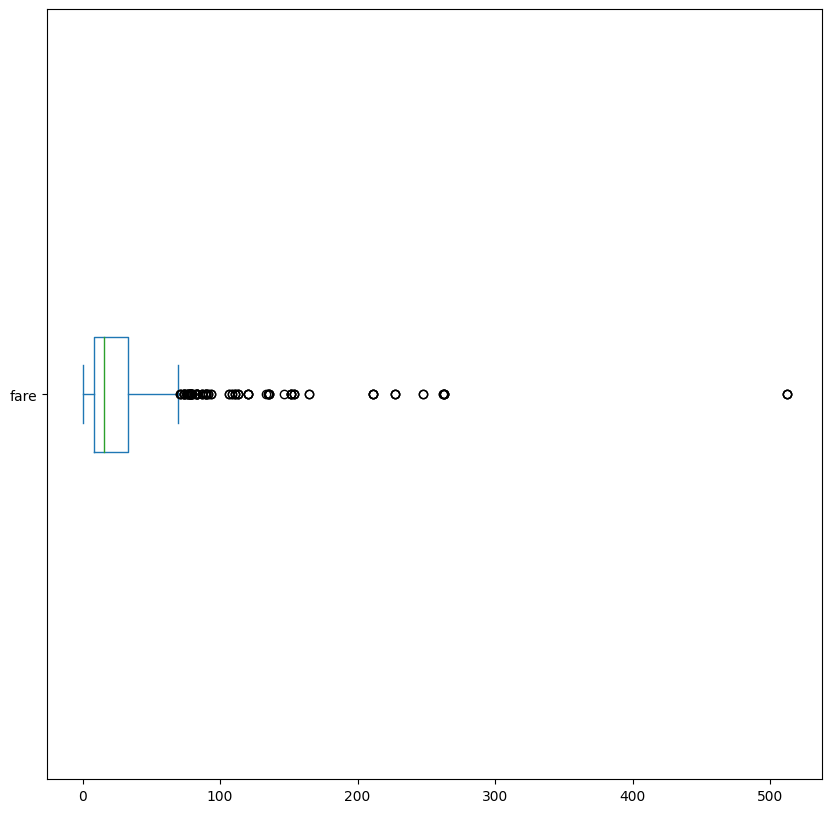

In [ ]:
df['fare'].plot.box(figsize=(10, 10),vert = False)

<Axes: >

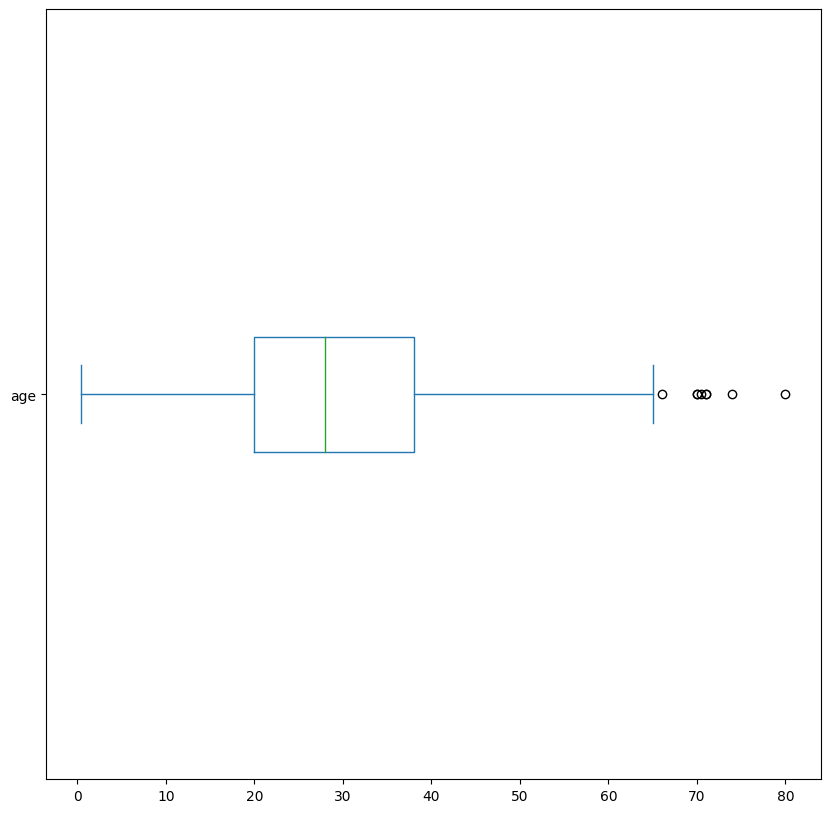

In [ ]:
df['age'].plot.box(figsize=(10, 10),vert = False)

<Axes: ylabel='Frequency'>

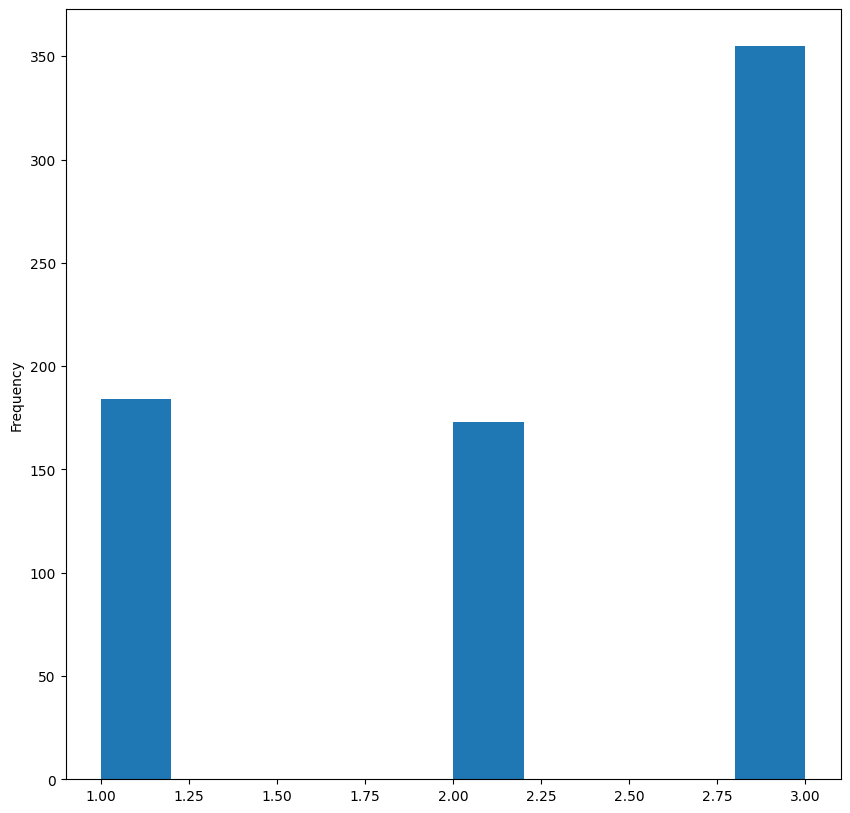

In [ ]:
df['pclass'].plot(kind = 'hist', figsize=(10, 10))

<Axes: ylabel='Frequency'>

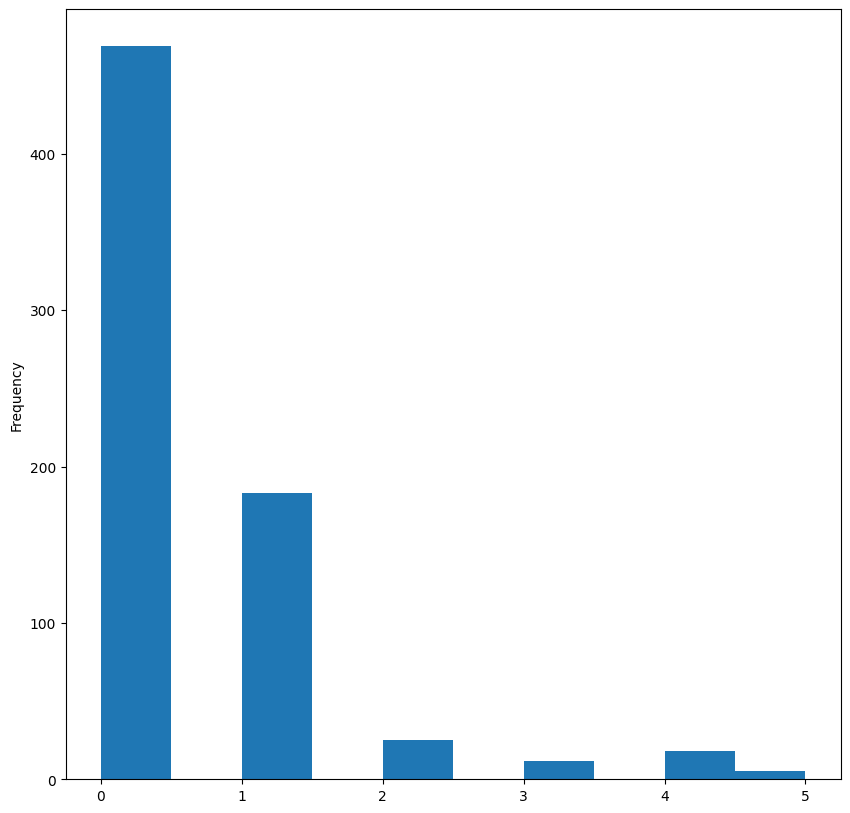

In [ ]:
df['sibsp'].plot(kind = 'hist', figsize=(10, 10))

<Axes: ylabel='Frequency'>

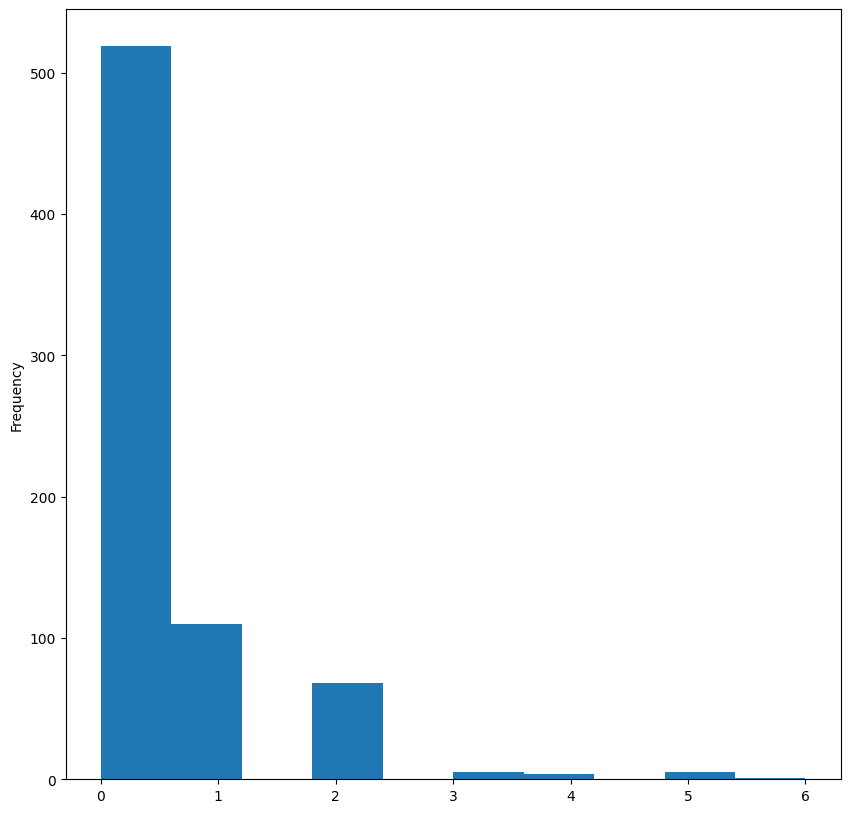

In [ ]:
df['parch'].plot(kind = 'hist', figsize=(10, 10))

<Axes: >

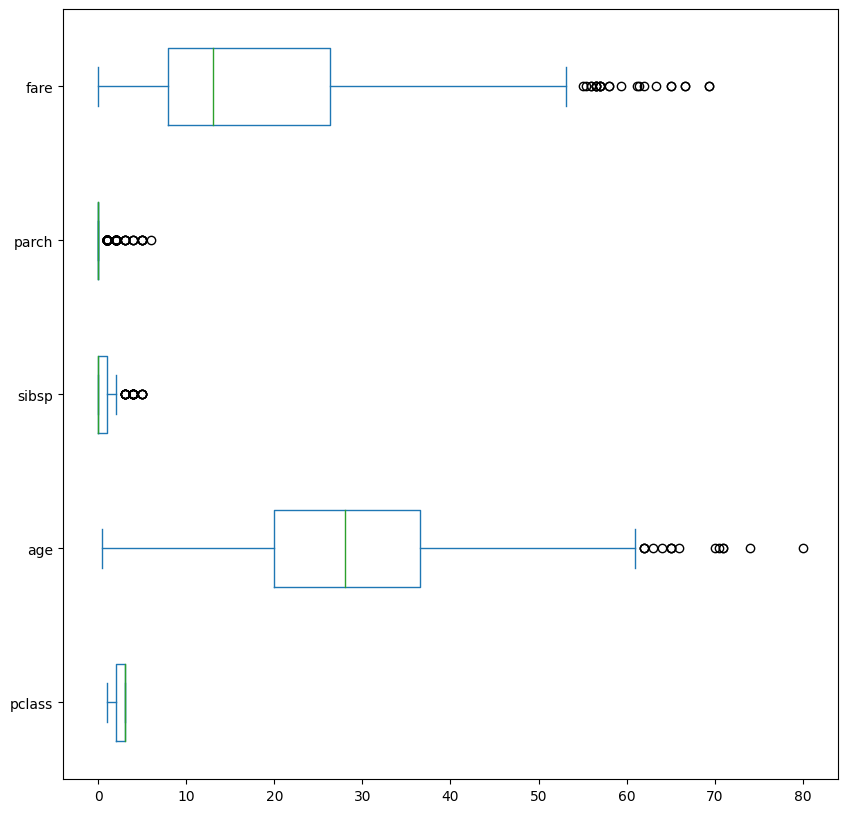

In [ ]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

df_clean = df[(df['fare'] > lower) & (df['fare'] < upper)]
df_clean.plot.box(figsize=(10, 10),vert = False)

In [ ]:
catd = df.select_dtypes(include='object')
catd.describe()

,sex,embarked
count,712,712
unique,2,3
top,male,S
freq,453,554


<Axes: xlabel='sex'>

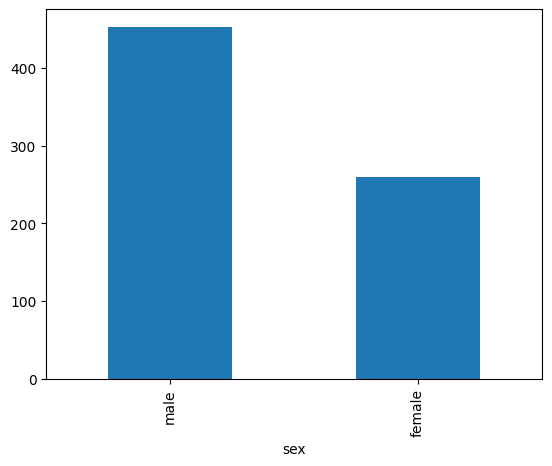

In [ ]:
df['sex'].value_counts().plot(kind='bar')

,0
fare,"Axes(0.125,0.11;0.775x0.77)"


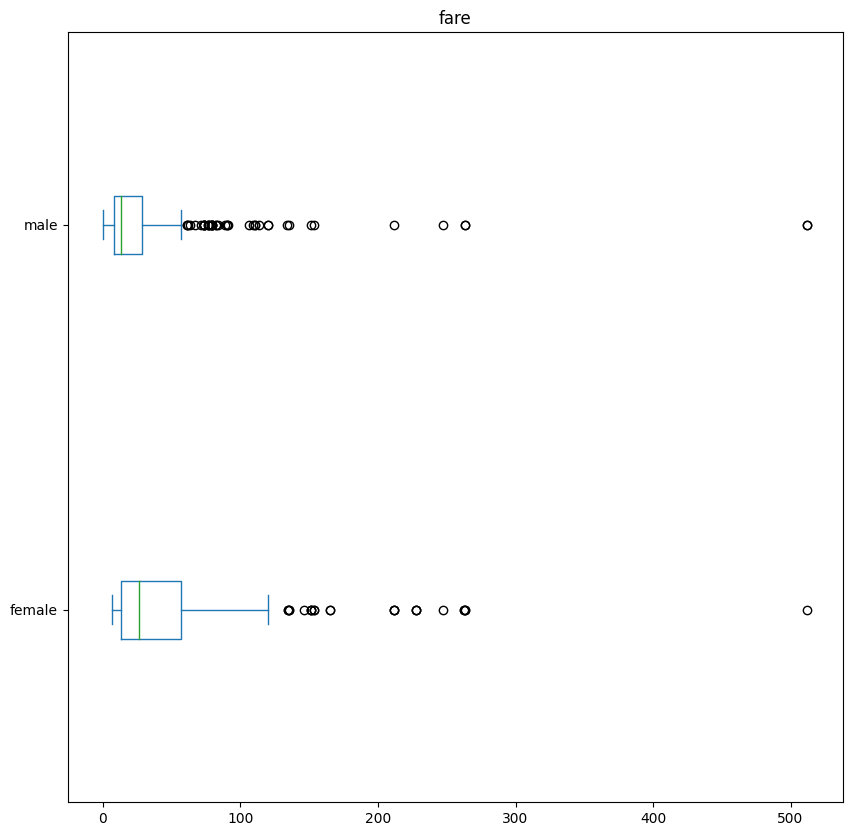

In [ ]:
df.plot.box(column = 'fare', by ='sex',figsize=(10, 10), vert = False )

,0
pclass,"Axes(0.125,0.11;0.775x0.77)"


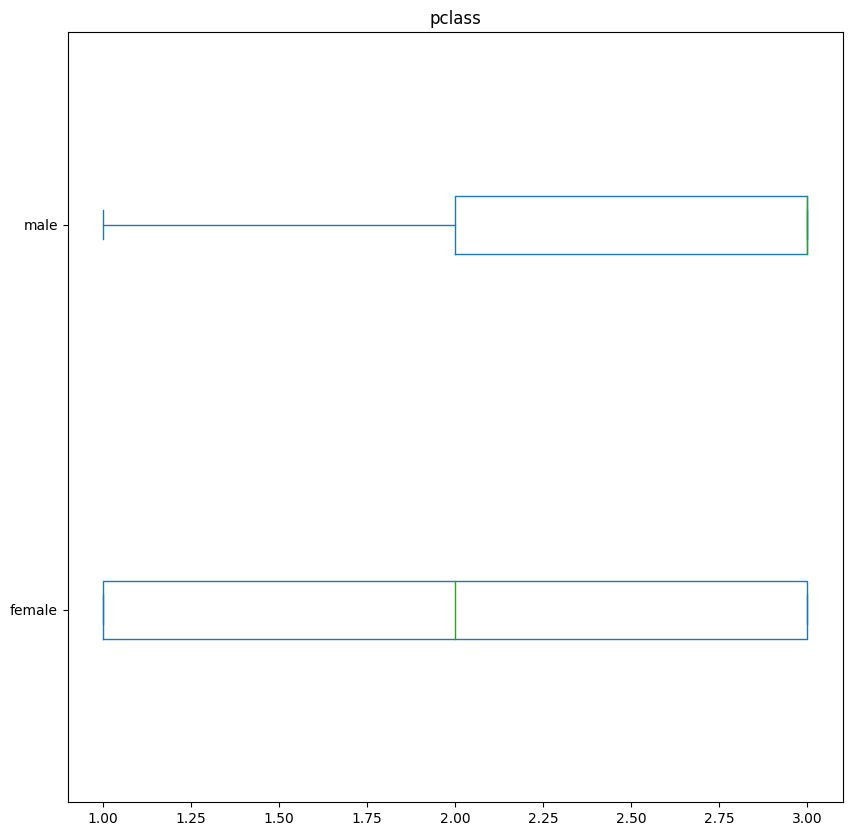

In [ ]:
df.plot.box(column = 'pclass', by ='sex',figsize=(10, 10), vert = False )

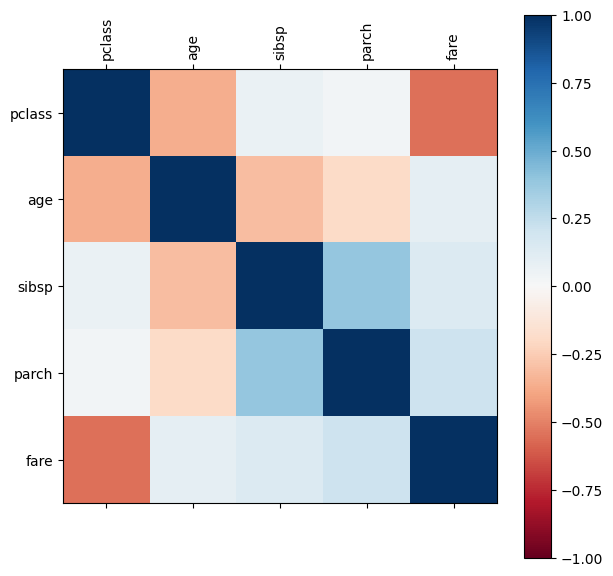

In [ ]:
corr = df.select_dtypes(include='number').corr(method='pearson')
fig = plt.figure(figsize = (7,7))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1,1)

<Axes: xlabel='embarked'>

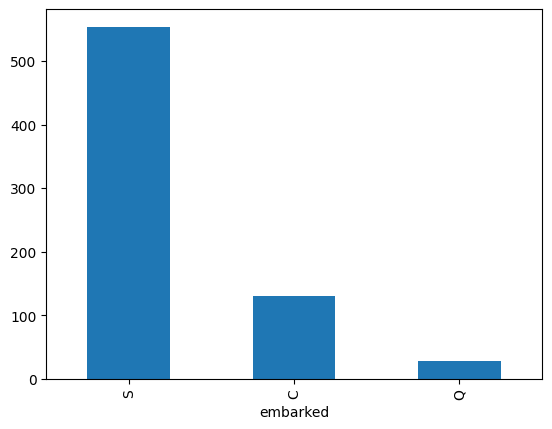

In [ ]:
df['embarked'].value_counts().plot(kind='bar')

Ogólnie widzimy, że cena wpływa na klasę biletu. Ponadto korelacja światła z liczbą krewnych jest śledzona od wieku.

Można zauważyć, że kobiety używają głównie klasy 2M, ale równie 3M i 1, podczas gdy mężczyźni wolą 3M, chociaż podróżują prawie dwa razy więcej.
Zdecydowana większość pasażerów idzie z S.